In [1]:
import xarray as xr
import numpy as np

In [2]:
lon = xr.DataArray(np.arange(0, 180, 1), dims=("lon", ))
depth = xr.DataArray(np.arange(0, 50, 5), dims=("depth", ))

In [3]:
MLD = xr.DataArray(
    5 + 20 * np.sin(np.deg2rad(lon)),
    dims=("lon", ),
    coords={"lon": lon},
)
MLD

<xarray.DataArray (lon: 180)>
array([ 5.        ,  5.34904813,  5.69798993,  6.04671912,  6.39512947,
        6.74311485,  7.09056927,  7.43738687,  7.78346202,  8.1286893 ,
        8.47296355,  8.81617991,  9.15823382,  9.49902109,  9.83843791,
       10.1763809 , 10.51274712, 10.84743409, 11.18033989, 11.51136309,
       11.84040287, 12.16735899, 12.49213187, 12.81462257, 13.13473286,
       13.45236523, 13.76742294, 14.07980999, 14.38943126, 14.6961924 ,
       15.        , 15.3007615 , 15.59838528, 15.8927807 , 16.18385807,
       16.47152873, 16.75570505, 17.03630046, 17.31322951, 17.58640782,
       17.85575219, 18.12118058, 18.38261213, 18.6399672 , 18.89316741,
       19.14213562, 19.38679601, 19.62707403, 19.86289651, 20.0941916 ,
       20.32088886, 20.54291923, 20.76021507, 20.9727102 , 21.18033989,
       21.38304089, 21.58075145, 21.77341136, 21.96096192, 22.14334601,
       22.32050808, 22.49239414, 22.65895186, 22.82013048, 22.97588093,
       23.12615574, 23.27090915, 23.41009707, 23.54367709, 23.67160853,
       23.79385242, 23.91037151, 24.02113033, 24.12609512, 24.22523392,
       24.31851653, 24.40591453, 24.4874013 , 24.56295201, 24.63254367,
       24.69615506, 24.75376681, 24.80536137, 24.85092303, 24.89043791,
       24.92389396, 24.95128101, 24.9725907 , 24.98781654, 24.9969539 ,
       25.        , 24.9969539 , 24.98781654, 24.9725907 , 24.95128101,
       24.92389396, 24.89043791, 24.85092303, 24.80536137, 24.75376681,
       24.69615506, 24.63254367, 24.56295201, 24.4874013 , 24.40591453,
       24.31851653, 24.22523392, 24.12609512, 24.02113033, 23.91037151,
       23.79385242, 23.67160853, 23.54367709, 23.41009707, 23.27090915,
       23.12615574, 22.97588093, 22.82013048, 22.65895186, 22.49239414,
       22.32050808, 22.14334601, 21.96096192, 21.77341136, 21.58075145,
       21.38304089, 21.18033989, 20.9727102 , 20.76021507, 20.54291923,
       20.32088886, 20.0941916 , 19.86289651, 19.62707403, 19.38679601,
       19.14213562, 18.89316741, 18.6399672 , 18.38261213, 18.12118058,
       17.85575219, 17.58640782, 17.31322951, 17.03630046, 16.75570505,
       16.47152873, 16.18385807, 15.8927807 , 15.59838528, 15.3007615 ,
       15.        , 14.6961924 , 14.38943126, 14.07980999, 13.76742294,
       13.45236523, 13.13473286, 12.81462257, 12.49213187, 12.16735899,
       11.84040287, 11.51136309, 11.18033989, 10.84743409, 10.51274712,
       10.1763809 ,  9.83843791,  9.49902109,  9.15823382,  8.81617991,
        8.47296355,  8.1286893 ,  7.78346202,  7.43738687,  7.09056927,
        6.74311485,  6.39512947,  6.04671912,  5.69798993,  5.34904813])
Coordinates:
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 172 173 174 175 176 177 178 179

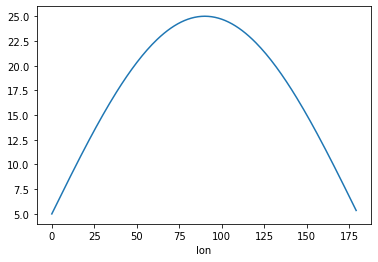

In [4]:
MLD.plot()

In [5]:
T = xr.DataArray(
    (
        np.random.normal(size=(len(depth), len(lon)))
        + 20 * xr.ufuncs.exp(- depth / MLD)
    ),
    coords={"lon": lon, "depth": depth},
)
T

<xarray.DataArray (depth: 10, lon: 180)>
array([[20.15342024, 21.76194269, 19.31941787, ..., 19.69090978,
        19.29795437, 18.88572477],
       [ 5.94643781,  7.07024156,  7.54514946, ...,  8.57630077,
         7.37686831,  7.27397385],
       [ 3.30100212,  3.48544336,  3.45816937, ...,  5.48885389,
         1.27947614,  3.48577974],
       ...,
       [-0.27294761, -1.2154945 , -0.43738779, ...,  1.22180859,
         0.85180221,  0.90215633],
       [ 0.15767511,  0.17320542,  1.83179165, ...,  3.16321685,
         1.52682803,  0.78275409],
       [ 0.34001118,  0.18787133, -0.19070028, ..., -0.32468552,
        -0.79351087,  0.16814484]])
Coordinates:
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 172 173 174 175 176 177 178 179
  * depth    (depth) int64 0 5 10 15 20 25 30 35 40 45

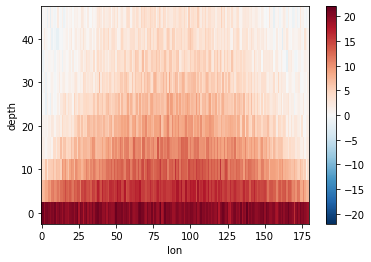

In [6]:
T.plot()

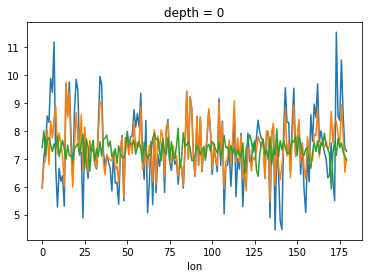

In [7]:
T.sel(depth=MLD, method="nearest").plot(label="T at MLD box")
T.interp(depth=MLD).plot(label="T interp to MLD")
(T.isel(depth=0) / np.exp(1)).plot(label="Tsurf/e");

In [8]:
from matplotlib import pyplot as plt

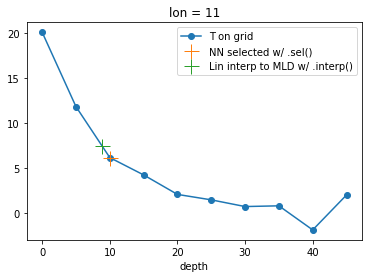

In [9]:
fig, ax = plt.subplots()

T.isel(lon=11).plot(
    ax=ax, marker='o',
    label="T on grid"
)
ax.plot(
    T.sel(depth=MLD, method="nearest").isel(lon=11).depth, 
    T.sel(depth=MLD, method="nearest").isel(lon=11),
    '+', markersize=15, 
    label="NN selected w/ .sel()"
)
ax.plot(
    T.interp(depth=MLD).isel(lon=11).depth, 
    T.interp(depth=MLD).isel(lon=11),
    '+', markersize=15, 
    label="Lin interp to MLD w/ .interp()"
)

ax.legend();